<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/projeto_2/classificador_projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*Indique a base escolhida.*<br />
Forest covertypes - https://archive.ics.uci.edu/ml/datasets/Covertype

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
#@title Importações necessárias: pandas, seaborn, matplotlib, numpy e sklearn.
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import fetch_covtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
df = fetch_covtype()
print(df['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [2]:
#@title Cria DataFrame a partir do dataset.
df_covtypes = pd.DataFrame(df['data'], columns=['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Rawah_Area','Neota_Area','Comanche_Peak_Area','Cache_la_Poudre_Area','tipo de solo 1','tipo de solo 2','tipo de solo 3','tipo de solo 4','tipo de solo 5','tipo de solo 6','tipo de solo 7','tipo de solo 8','tipo de solo 9','tipo de solo 10','tipo de solo 11','tipo de solo 12','tipo de solo 13','tipo de solo 14','tipo de solo 15','tipo de solo 16','tipo de solo 17','tipo de solo 18','tipo de solo 19','tipo de solo 20','tipo de solo 21','tipo de solo 22','tipo de solo 23','tipo de solo 24','tipo de solo 25','tipo de solo 26','tipo de solo 27','tipo de solo 28','tipo de solo 29','tipo de solo 30','tipo de solo 31','tipo de solo 32','tipo de solo 33','tipo de solo 34','tipo de solo 35','tipo de solo 36','tipo de solo 37','tipo de solo 38','tipo de solo 39','tipo de solo 40'])
df_covtypes['Cover_Type'] = df['target']
df_covtypes.head()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,Rawah_Area,Neota_Area,Comanche_Peak_Area,Cache_la_Poudre_Area,tipo de solo 1,tipo de solo 2,tipo de solo 3,tipo de solo 4,tipo de solo 5,tipo de solo 6,tipo de solo 7,tipo de solo 8,tipo de solo 9,tipo de solo 10,tipo de solo 11,tipo de solo 12,tipo de solo 13,tipo de solo 14,tipo de solo 15,tipo de solo 16,tipo de solo 17,tipo de solo 18,tipo de solo 19,tipo de solo 20,tipo de solo 21,tipo de solo 22,tipo de solo 23,tipo de solo 24,tipo de solo 25,tipo de solo 26,tipo de solo 27,tipo de solo 28,tipo de solo 29,tipo de solo 30,tipo de solo 31,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [0]:
#@title Define funções para tratamento de dados categóricos.
def nomea_coverType(int):
  if int == 1:
    return 'abeto'
  elif int == 2:
    return 'pinheiro'
  elif int == 3:
    return 'Ponderosa'
  elif int == 4:
    return 'salgueiro'
  elif int == 5:
    return 'álamo'
  elif int == 6:
    return 'abeto-Douglas'
  elif int == 7:
    return 'algodoeiro'

def convert_clusters(int):
  if int == 1:
    return 0
  elif int == 2:
    return 1
  elif int == 3:
    return 2
  elif int == 4:
    return 3
  elif int == 5:
    return 4
  elif int == 6:
    return 5
  elif int == 7:
    return 6

def convert_coverType(cluster):
  if cluster == 'abeto':
    return 0
  elif cluster == 'pinheiro':
    return 1
  elif cluster == 'Ponderosa':
    return 2
  elif cluster == 'salgueiro':
    return 3
  elif cluster == 'álamo':
    return 4
  elif cluster == 'abeto-Douglas':
    return 5
  elif cluster == 'algodoeiro':
    return 6

In [4]:
#@title Cria DataFrame de amostra para análise exploratória dos dados.
amostra=df_covtypes.copy()
amostra['Cover_Type'] = df_covtypes['Cover_Type'].apply(nomea_coverType)
amostra.head()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,Rawah_Area,Neota_Area,Comanche_Peak_Area,Cache_la_Poudre_Area,tipo de solo 1,tipo de solo 2,tipo de solo 3,tipo de solo 4,tipo de solo 5,tipo de solo 6,tipo de solo 7,tipo de solo 8,tipo de solo 9,tipo de solo 10,tipo de solo 11,tipo de solo 12,tipo de solo 13,tipo de solo 14,tipo de solo 15,tipo de solo 16,tipo de solo 17,tipo de solo 18,tipo de solo 19,tipo de solo 20,tipo de solo 21,tipo de solo 22,tipo de solo 23,tipo de solo 24,tipo de solo 25,tipo de solo 26,tipo de solo 27,tipo de solo 28,tipo de solo 29,tipo de solo 30,tipo de solo 31,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,álamo
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,álamo
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pinheiro
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pinheiro
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,álamo


In [5]:
#@title Cria e converte DataFrame com as colunas mais relevantes.
amostra = amostra[np.random.rand(len(amostra)) < 0.005]
df_amostra = amostra[['Aspecto','Elevação','Inclinação', 'Cover_Type']]
df_amostra_area = amostra.copy()

for row, area in amostra.iterrows():
  if amostra.loc[row, 'Rawah_Area'] == 1:
    df_amostra_area.loc[row, 'Area'] = 'Rawah'
  elif amostra.loc[row, 'Neota_Area'] == 1:
    df_amostra_area.loc[row, 'Area'] = 'Neota'
  elif amostra.loc[row, 'Comanche_Peak_Area'] == 1:
    df_amostra_area.loc[row, 'Area'] = 'Comanche_Peak'
  else:
    df_amostra_area.loc[row, 'Area'] = 'Cache_la_Poudre'

df_amostra_area = df_amostra_area[['Aspecto','Elevação','Inclinação', 'Cover_Type', 'Area']]
print('\nDataset amostra cobertura\n')
df_amostra.info()
print('\nDataset amostra area\n')
df_amostra_area.info()


Dataset amostra cobertura

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 133 to 580786
Data columns (total 4 columns):
Aspecto       2970 non-null float64
Elevação      2970 non-null float64
Inclinação    2970 non-null float64
Cover_Type    2970 non-null object
dtypes: float64(3), object(1)
memory usage: 196.0+ KB

Dataset amostra area

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 133 to 580786
Data columns (total 5 columns):
Aspecto       2970 non-null float64
Elevação      2970 non-null float64
Inclinação    2970 non-null float64
Cover_Type    2970 non-null object
Area          2970 non-null object
dtypes: float64(3), object(2)
memory usage: 219.2+ KB


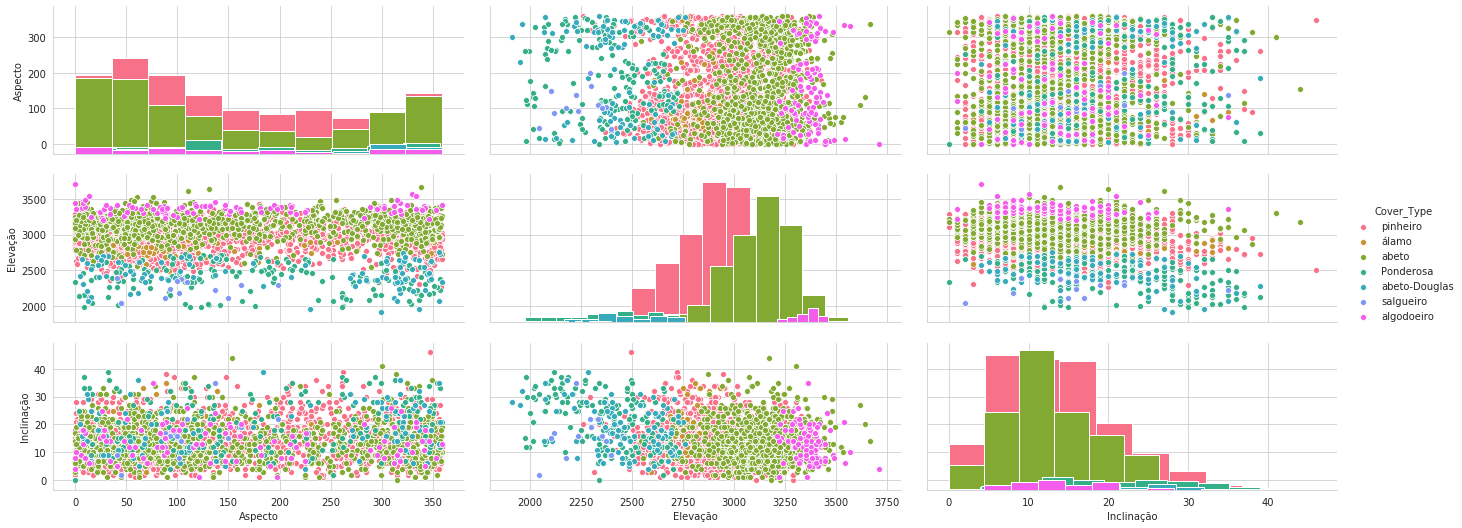

In [6]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
sns.pairplot(df_amostra, hue='Cover_Type', diag_kind='hist', aspect=2.5)

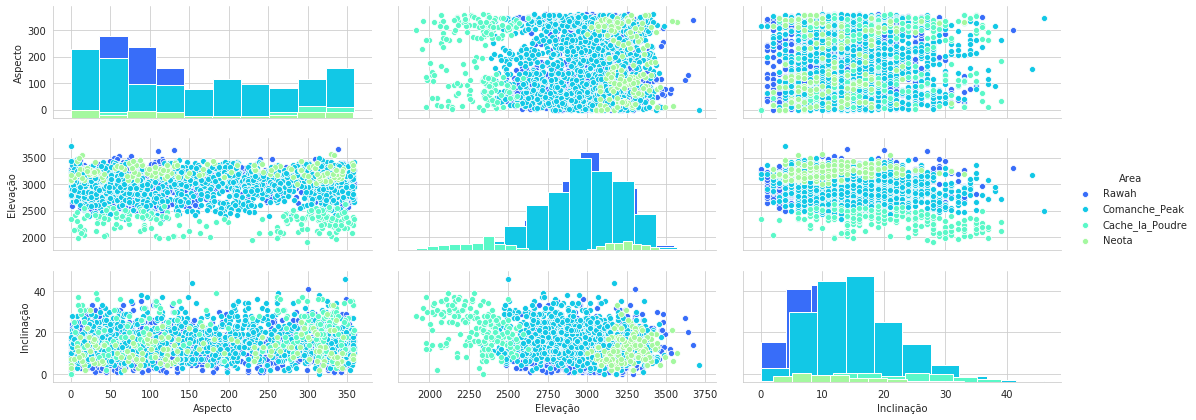

In [7]:
df_amostra_area = df_amostra_area[['Aspecto','Elevação','Inclinação', 'Cover_Type', 'Area']]
sns.pairplot(df_amostra_area, hue='Area', diag_kind='hist', height=2, aspect=2.5)

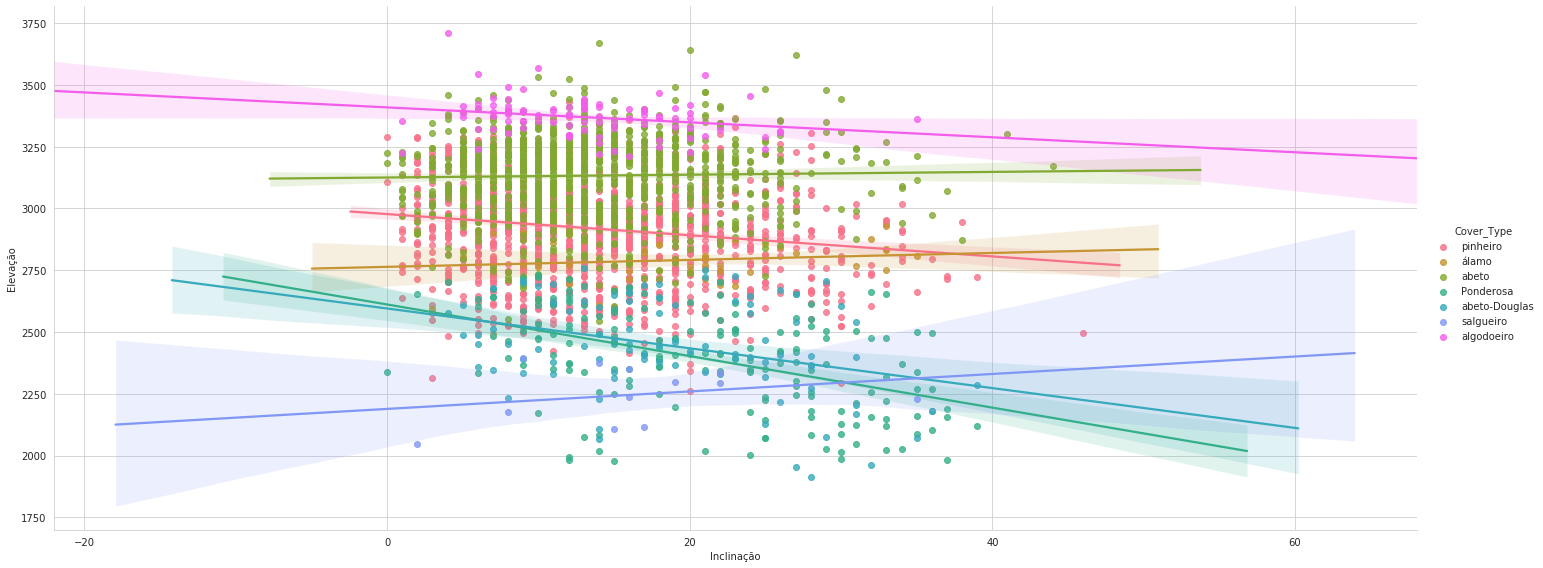

In [8]:
sns.lmplot('Inclinação','Elevação',  df_amostra, hue='Cover_Type', height=8, aspect=2.5)

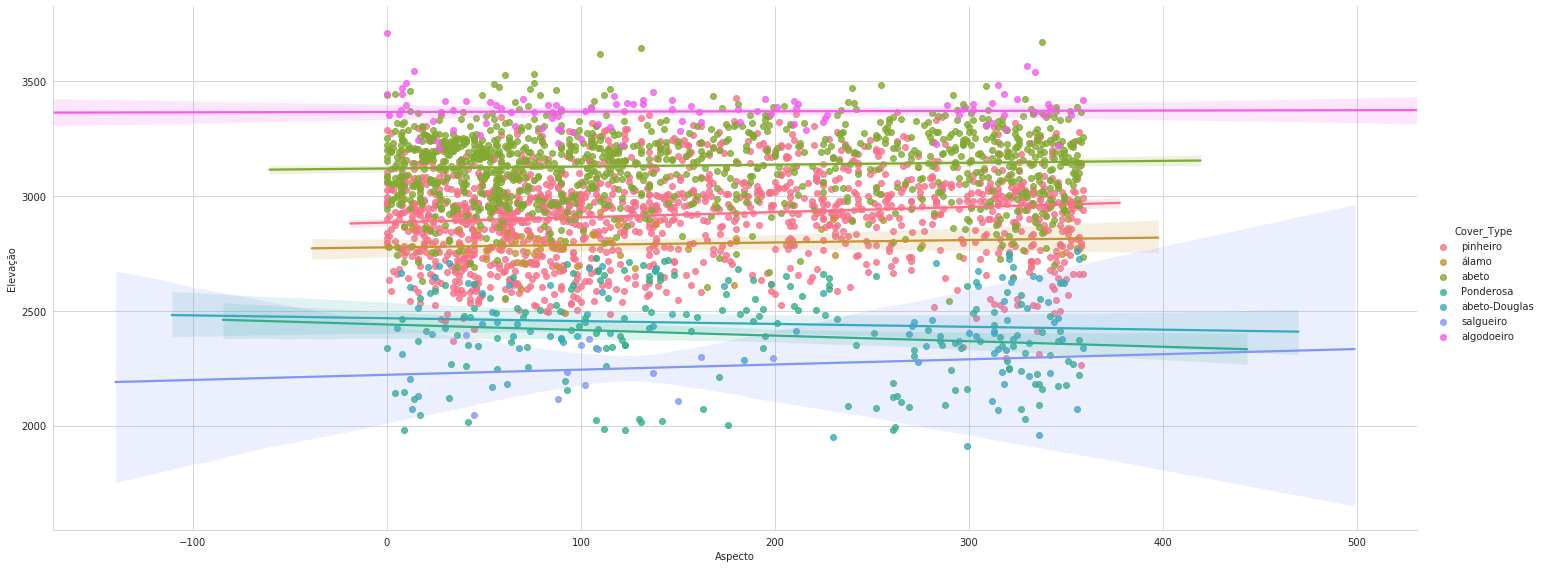

In [9]:
sns.lmplot('Aspecto','Elevação',  df_amostra, hue='Cover_Type', height=8, aspect=2.5)

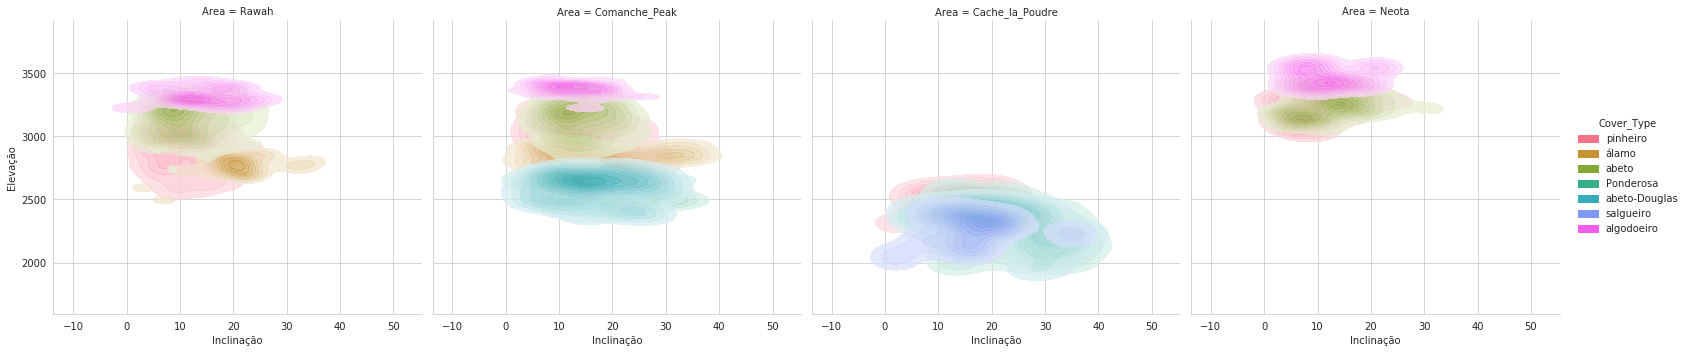

In [10]:
grid = sns.FacetGrid(df_amostra_area, col='Area', hue='Cover_Type', aspect=1.1, height=5)
grid.map(sns.kdeplot,'Inclinação', 'Elevação', shade=True, shade_lowest=False, alpha=0.7)
grid.add_legend()

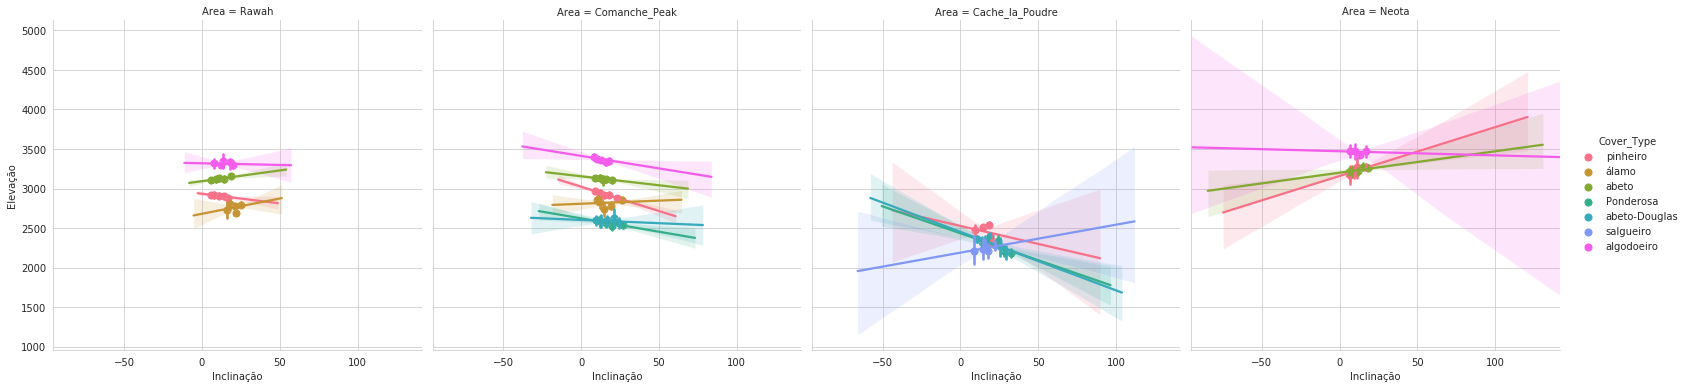

In [11]:
plt.xlim=(0, 50)
plt.ylim=(1500, 4000)
sns.lmplot('Inclinação', 'Elevação', df_amostra_area, hue='Cover_Type', col='Area', height=5.5, x_bins=5)

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*Árvore de decisão*


#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [12]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
dtree = DecisionTreeClassifier()
X = df['data']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predict = dtree.predict(X_test)
baseline_classification = classification_report(y_test, predict)
baseline_confusion = confusion_matrix(y_test, predict)

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
X = scaler.fit_transform(X[:,:10])
df_normalizado = pd.DataFrame(X, columns=df_covtypes.columns[:10])
df_normalizado = df_normalizado.join(df_covtypes.drop(['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Cover_Type'], inplace=False, axis=1))
X = df_normalizado

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=54)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
dtree.fit(X_train, y_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
componentes = pca.explained_variance_ratio_

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predict = dtree.predict(X_test)
classification = classification_report(y_test, predict)
confusion = confusion_matrix(y_test, predict)

In [20]:
print('------------Baseline Classification------------\n', baseline_classification)
print('------------------Classification-----------------\n', classification)

------------Baseline Classification------------
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     52797
           2       0.95      0.95      0.95     71067
           3       0.93      0.93      0.93      8771
           4       0.86      0.82      0.84       688
           5       0.83      0.85      0.84      2367
           6       0.88      0.88      0.88      4335
           7       0.95      0.94      0.95      5228

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

------------------Classification-----------------
               precision    recall  f1-score   support

           1       0.90      0.90      0.90     21145
           2       0.92      0.92      0.92     28349
           3       0.89      0.89      0.89      3566
           4       0.77      0.79      0.78       301
           5       0.74      0.7

In [21]:
print('------------Baseline Confusion------------\n', baseline_confusion)
print('\n-------------------Confusion-------------------\n', confusion)

------------Baseline Confusion------------
 [[49514  2980     3     0    60     9   231]
 [ 3025 67369   177     2   319   138    37]
 [    4   195  8132    67    29   344     0]
 [    0     1    80   566     0    41     0]
 [   44   284    23     0  2009     7     0]
 [    7   147   352    20     7  3802     0]
 [  251    53     0     0     1     0  4923]]

-------------------Confusion-------------------
 [[19121  1823     6     0    23     6   166]
 [ 1836 26089   110     0   179   113    22]
 [    3    97  3180    52    16   218     0]
 [    0     2    45   237     0    17     0]
 [   29   190    14     0   643     5     1]
 [   10   109   225    20     3  1402     0]
 [  149    18     0     0     0     0  1923]]


#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
dtree = DecisionTreeClassifier(random_state=101, criterion='entropy')
X = df['data']
y = df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [0]:
predict = dtree.predict(X_test)
tunned_classification = classification_report(y_test, predict)
tunned_confusion = confusion_matrix(y_test, predict)

In [25]:
print('------------Baseline Classification------------\n', baseline_classification)
print('------------------Classification-----------------\n', classification)
print('-------------Tunned Classification--------------\n', tunned_classification)

------------Baseline Classification------------
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     52797
           2       0.95      0.95      0.95     71067
           3       0.93      0.93      0.93      8771
           4       0.86      0.82      0.84       688
           5       0.83      0.85      0.84      2367
           6       0.88      0.88      0.88      4335
           7       0.95      0.94      0.95      5228

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

------------------Classification-----------------
               precision    recall  f1-score   support

           1       0.90      0.90      0.90     21145
           2       0.92      0.92      0.92     28349
           3       0.89      0.89      0.89      3566
           4       0.77      0.79      0.78       301
           5       0.74      0.7

In [26]:
print('------------Baseline Confusion------------\n', baseline_confusion)
print('\n---------------Confusion-------------------\n', confusion)
print('\n------------Tunned Confusion-------------------\n', tunned_confusion)

------------Baseline Confusion------------
 [[49514  2980     3     0    60     9   231]
 [ 3025 67369   177     2   319   138    37]
 [    4   195  8132    67    29   344     0]
 [    0     1    80   566     0    41     0]
 [   44   284    23     0  2009     7     0]
 [    7   147   352    20     7  3802     0]
 [  251    53     0     0     1     0  4923]]

---------------Confusion-------------------
 [[19121  1823     6     0    23     6   166]
 [ 1836 26089   110     0   179   113    22]
 [    3    97  3180    52    16   218     0]
 [    0     2    45   237     0    17     0]
 [   29   190    14     0   643     5     1]
 [   10   109   225    20     3  1402     0]
 [  149    18     0     0     0     0  1923]]

------------Tunned Confusion-------------------
 [[20084  1056     0     0     8     2    84]
 [ 1016 27115    73     0    98    60     8]
 [    0    61  3467    29    12   119     0]
 [    0     0    17   209     0     9     0]
 [   11    95     5     0   793     0     0]
 [ 

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*